In [18]:




import json
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


def load_json(file_path):
    with open(f"{file_path}") as f:
        data = json.load(f)
    return data

def write_json(data, file_path):
    with open(f"{file_path}", "w") as f:
        json.dump(data, f, indent=4)

def load_csv(file_path):
    with open(file_path, "r") as f:
        # split by ;
        data = f.readlines()
        header = data[0].split(";")
        data = [line.split(";") for line in data[1:]]
        data = [dict(zip(header, line)) for line in data]
    return data


path = "../data/sec_filings/0_id_mapper_questions.json"
id_mapper_data = load_json(path)
questions_path = ".././SEC_Filing_Tables_Dataset.csv"
questions = pd.read_csv(filepath_or_buffer=questions_path, sep=";")
questions.fillna("", inplace=True)

id_list = [doc["question_id"] for doc in id_mapper_data]

# questions to dict
questions = questions.to_dict(orient="records")
questions_filtered = [q for q in questions if q["question"] in id_list]

print(f" {len(questions_filtered)} questions found in dataset")








 310 questions found in dataset


In [19]:
categories = [doc["category"] for doc in id_mapper_data]

for c in categories:
    print(c)

lookup
lookup
lookup
lookup
lookup
lookup
lookup
lookup
lookup
lookup
lookup
lookup
advanced lookup
calculation
calculation
calculation
calculation
lookup
lookup
lookup
lookup
boolean
advanced lookup
advanced lookup
calculation
calculation
calculation
calculation
lookup
lookup
lookup
lookup
boolean
boolean
advanced lookup
boolean
calculation
calculation
calculation
boolean
boolean
advanced lookup
calculation
calculation
lookup
lookup
lookup
boolean
advanced lookup
advanced lookup
boolean
advanced lookup
advanced lookup
calculation
calculation
calculation
calculation
lookup
lookup
lookup
lookup
advanced lookup
calculation
calculation
calculation
lookup
lookup
lookup
lookup
lookup
lookup
advanced lookup
boolean
advanced lookup
boolean
calculation
calculation
calculation
calculation
calculation
calculation
lookup
lookup
lookup
boolean
boolean
boolean
calculation
calculation
calculation
lookup
lookup
advanced lookup
lookup
lookup
calculation
lookup
lookup
boolean
lookup
boolean
calculation

In [20]:
print(questions_filtered[:1])

print(id_mapper_data[:1])

count_disagrees = 0
count_agrees = 0
for doc in id_mapper_data:
    item = next(q for q in questions_filtered if q["question"] == doc["question_id"])
    if item["category"] != doc["category"]:
        count_disagrees += 1
        doc["category"] = item["category"]
    else:
        count_agrees += 1
        

print(f"Agrees: {count_agrees}")
print(f"Disagrees: {count_disagrees}")

write_json(id_mapper_data, path)

[{'file': 'awk-20231231.htm', 'category': 'lookup', 'question': 'What are the total regulated business operating revenues of American Water Works in total 2023?', 'answer': '3920', 'unit': 'mio. $', 'search reference': 'Total.*?3,?920'}]
[{'id': 'awk-20231231.htm', 'question_id': 'What are the total regulated business operating revenues of American Water Works in total 2023?', 'category': 'lookup', 'domain': 'business & economy', 'table': '<table>  <tr>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   <td>   </td>   

In [21]:
documents_with_empty_tables = [doc["question_id"] for doc in id_mapper_data if doc["table"] == ""]
    
filtered_questions = [q for q in questions if q["question"] in documents_with_empty_tables]

for q in filtered_questions:
    print(f"Question: {q['question']} \nSearch Reference: {q['search reference']}\n")

In [22]:
doc_ids = list({doc["id"] for doc in id_mapper_data})

/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_48499/4225732448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_categories))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_48499/4225732448.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


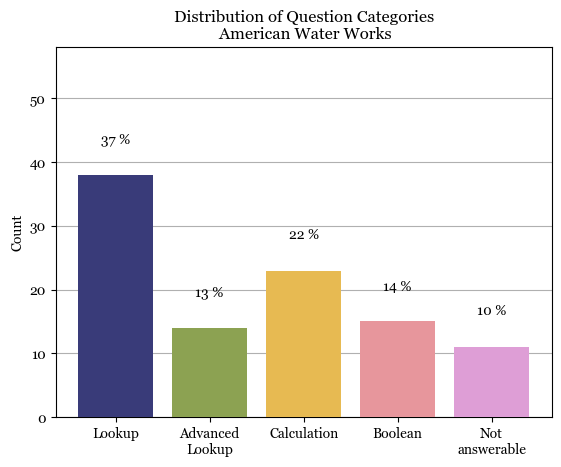

In [23]:
import textwrap
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Georgia'

# plot the distribution of the categories
# also show the percentage of the categories as numbers
categories = [doc["category"] for doc in id_mapper_data if doc["id"] == doc_ids[0]]
unique_categories = ["lookup", "advanced lookup", "calculation", "boolean", "not answerable"]
labels = ["Lookup", "Advanced Lookup", "Calculation", "Boolean", "Not answerable"]
category_counts = [categories.count(cat) for cat in unique_categories]
category_percentages = [count / len(categories) for count in category_counts]

# Wrap labels if they are too long
wrapped_labels = [textwrap.fill(label, 11) for label in labels]

# Define colors for each category
colors = cm.get_cmap('tab20b', len(unique_categories))

fig, ax = plt.subplots()
bars = ax.bar(unique_categories, category_counts, color=[colors(i) for i in range(len(unique_categories))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Categories\n American Water Works", fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(category_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, cat in enumerate(unique_categories):
    ax.text(i, category_counts[i] + 5, f"{int(category_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing

ax.yaxis.grid(True, zorder=0)
plt.show()

# save plot to pdf
fig.savefig("../data/results/category_distribution_sec_filings_awk.pdf", bbox_inches='tight')

/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_48499/3731339259.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_categories))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_48499/3731339259.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


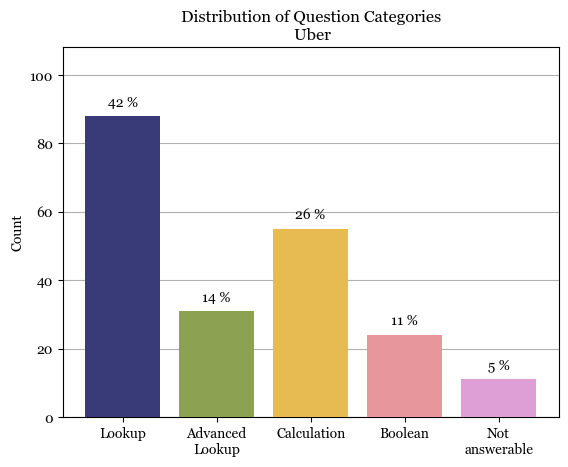

In [24]:
import textwrap
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Georgia'

# plot the distribution of the categories
# also show the percentage of the categories as numbers
categories = [doc["category"] for doc in id_mapper_data if doc["id"] == doc_ids[1]]
unique_categories = ["lookup", "advanced lookup", "calculation", "boolean", "not answerable"]
labels = ["Lookup", "Advanced Lookup", "Calculation", "Boolean", "Not answerable"]
category_counts = [categories.count(cat) for cat in unique_categories]
category_percentages = [count / len(categories) for count in category_counts]

# Wrap labels if they are too long
wrapped_labels = [textwrap.fill(label, 11) for label in labels]

# Define colors for each category
colors = cm.get_cmap('tab20b', len(unique_categories))

fig, ax = plt.subplots()
bars = ax.bar(unique_categories, category_counts, color=[colors(i) for i in range(len(unique_categories))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Categories\n Uber", fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(category_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, cat in enumerate(unique_categories):
    ax.text(i, category_counts[i] + 3, f"{int(category_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing

ax.yaxis.grid(True, zorder=0)
plt.show()

# save plot to pdf
fig.savefig("../data/results/category_distribution_sec_filings_uber.pdf", bbox_inches='tight')

/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_48499/2000132418.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_domains))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_48499/2000132418.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_48499/2000132418.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


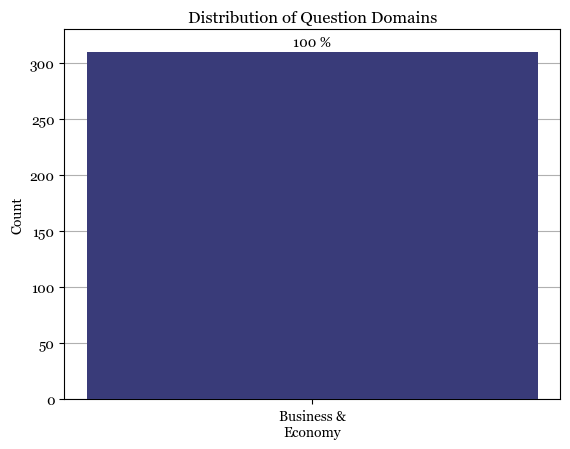

In [25]:
# plot the distribution of domains
# also show the percentage of the domains as numbers
domains = [doc["domain"] for doc in id_mapper_data]
unique_domains = list(set(domains))
domain_counts = [domains.count(domain) for domain in unique_domains]
domain_percentages = [count / len(domains) for count in domain_counts]


# Wrap labels if they are too long
labels = ["Business & Economy", "Science & Technology", "Politics & Society", "Sports &   Entertainment", "Geography &  Transportation"]
wrapped_labels = [textwrap.fill(label, 14) for label in labels]

# Define colors for each domain
colors = cm.get_cmap('tab20b', len(unique_domains))

fig, ax = plt.subplots()
bars = ax.bar(unique_domains, domain_counts, color=[colors(i) for i in range(len(unique_domains))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Domains", fontname='Georgia')
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(domain_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, domain in enumerate(unique_domains):
    ax.text(i, domain_counts[i] + 5, f"{int(domain_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing
    
ax.yaxis.grid(True, zorder=0)
plt.show()

# save figure to pdf
fig.savefig("../data/results/distribution_of_question_domains_wikitables.pdf", bbox_inches='tight')

In [26]:
document_summary_path = "../data/evaluation/dataset_analysis/analysis-2025-03-10-09-44-29.json"
document_summary = load_json(document_summary_path)


# 0: html, 1: plain text, # 2: csv
document_list = document_summary[0]['dataset_summary']['document_list']



for i, table_data_html in enumerate(document_summary[0]['dataset_summary']['table_list']):    
    print(f"\nDocument: {document_list[i]['id']}")
    print(f"Num of HTML tokens: {document_list[i]['num_tokens']}")
    print(f"Num of tables: {len(table_data_html['num_tokens'])}")
    
    
    print("\nRows:")
    print(f"  Avg: {table_data_html["rows_statistics"]["avg"]}")
    print(f"  Min: {table_data_html["rows_statistics"]["min"]}")
    print(f"  Max: {table_data_html["rows_statistics"]["max"]}")
    print(f"  Std: {table_data_html["rows_statistics"]["std"]}")

    print("\nColumns:")
    print(f"  Avg: {table_data_html["columns_statistics"]["avg"]}")
    print(f"  Min: {table_data_html["columns_statistics"]["min"]}")
    print(f"  Max: {table_data_html["columns_statistics"]["max"]}")
    print(f"  Std: {table_data_html["columns_statistics"]["std"]}")


    print("\nTokens HTML:")
    print(f"  Avg: {table_data_html["token_statistics"]["avg"]}")
    print(f"  Min: {table_data_html["token_statistics"]["min"]}")
    print(f"  Max: {table_data_html["token_statistics"]["max"]}")
    print(f"  Std: {table_data_html["token_statistics"]["std"]}")
    
    print("\nTokens TabTree Text:")
    table_data_tabtree = document_summary[1]['dataset_summary']['table_list'][i]
    
    print(f"  Avg: {table_data_tabtree["token_statistics"]["avg"]}")
    print(f"  Min: {table_data_tabtree["token_statistics"]["min"]}")
    print(f"  Max: {table_data_tabtree["token_statistics"]["max"]}")
    print(f"  Std: {table_data_tabtree["token_statistics"]["std"]}")





Document: uber-20231231.htm
Num of HTML tokens: 185120
Num of tables: 103

Rows:
  Avg: 10.407766990291263
  Min: 1
  Max: 48
  Std: 8.136501589778236

Columns:
  Avg: 9.019417475728156
  Min: 2
  Max: 31
  Std: 5.1350321323698935

Tokens HTML:
  Avg: 722.5825242718447
  Min: 63
  Max: 3974
  Std: 708.6233820293236

Tokens TabTree Text:
  Avg: 1917.8725490196077
  Min: 110
  Max: 10124
  Std: 2023.6332336044509

Document: awk-20231231.htm
Num of HTML tokens: 194264
Num of tables: 114

Rows:
  Avg: 10.587719298245615
  Min: 1
  Max: 46
  Std: 7.994308725048211

Columns:
  Avg: 9.587719298245615
  Min: 1
  Max: 26
  Std: 5.597322987193156

Tokens HTML:
  Avg: 781.578947368421
  Min: 54
  Max: 3490
  Std: 680.004203995478

Tokens TabTree Text:
  Avg: 2298.157894736842
  Min: 74
  Max: 18169
  Std: 2842.9393535655504
